#Library

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#Exploratory Data Analysis (EDA)

In [ ]:
# Memeriksa jumlah baris dan kolom
df.shape

(2200, 8)

In [ ]:
# Memeriksa info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
# Memeriksa summary statistic
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<Axes: xlabel='label'>

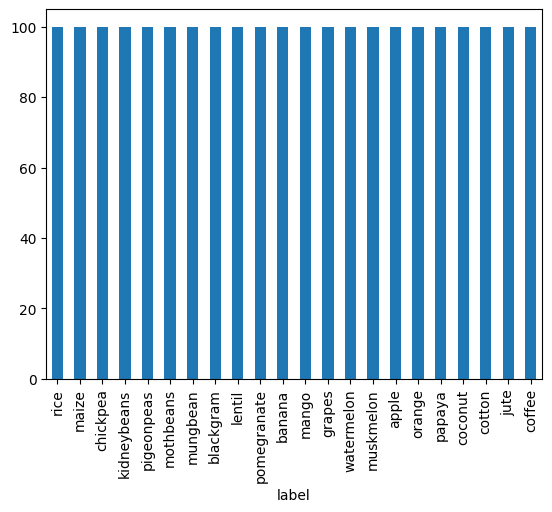

In [ ]:
# Memeriksa distribusi label
df['label'].value_counts().plot(kind='bar')

#Pre-Processing Data

In [3]:
# Encode label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [4]:
# Pisah fitur dan label
X = df.drop('label', axis=1)
y = df['label']

In [5]:
# Cek label sudah terpisah
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [6]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# bangun model tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(22, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,734 (30.21 KB)

 Trainable params: 7,606 (29.71 KB)

 Non-trainable params: 128 (512.00 B)

In [9]:
# callback untuk simpan model terbaik
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

In [10]:
#tambah callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [11]:
# latih model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[checkpoint, early_stopping])

Epoch 1/100
24/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0629 - loss: 3.1378 
Epoch 1: val_loss improved from inf to 2.40289, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1002 - loss: 3.0118 - val_accuracy: 0.2812 - val_loss: 2.4029
Epoch 2/100
27/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4110 - loss: 2.1346  
Epoch 2: val_loss improved from 2.40289 to 1.61178, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4359 - loss: 2.0402 - val_accuracy: 0.5114 - val_loss: 1.6118
Epoch 3/100
25/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6022 - loss: 1.3503 
Epoch 3: val_loss improved from 1.61178 to 1.03692, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6154 - loss: 1.2928 - val_accuracy: 0.7159 - val_loss: 1.0369
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7331 - loss: 0.9030
Epoch 4: val_loss improved from 1.03692 to 0.57751, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7335 - loss: 0.9011 - val_accuracy: 0.8324 - val_loss: 0.5775
Epoch 5/100
32/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8143 - loss: 0.6672
Epoch 5: val_loss improved from 0.57751 to 0.40506, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8141 - loss: 0.6526 - val_accuracy: 0.8920 - val_loss: 0.4051
Epoch 6/100
34/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8310 - loss: 0.5829
Epoch 6: val_loss improved from 0.40506 to 0.28723, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8334 - loss: 0.5699 - val_accuracy: 0.9290 - val_loss: 0.2872
Epoch 7/100
36/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8574 - loss: 0.4051
Epoch 7: val_loss improved from 0.28723 to 0.20564, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8603 - loss: 0.4010 - val_accuracy: 0.9574 - val_loss: 0.2056
Epoch 8/100
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8951 - loss: 0.3355
Epoch 8: val_loss improved from 0.20564 to 0.15918, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8934 - loss: 0.3388 - val_accuracy: 0.9602 - val_loss: 0.1592
Epoch 9/100
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8857 - loss: 0.3566
Epoch 9: val_loss improved from 0.15918 to 0.14812, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8872 - loss: 0.3526 - val_accuracy: 0.9602 - val_loss: 0.1481
Epoch 10/100
24/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.2788 
Epoch 10: val_loss improved from 0.14812 to 0.14238, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9009 - loss: 0.2914 - val_accuracy: 0.9517 - val_loss: 0.1424
Epoch 11/100
25/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2692 
Epoch 11: val_loss improved from 0.14238 to 0.13973, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9154 - loss: 0.2705 - val_accuracy: 0.9489 - val_loss: 0.1397
Epoch 12/100
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8961 - loss: 0.2892
Epoch 12: val_loss improved from 0.13973 to 0.10925, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8973 - loss: 0.2861 - val_accuracy: 0.9688 - val_loss: 0.1093
Epoch 13/100
25/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9401 - loss: 0.1813   
Epoch 13: val_loss did not improve from 0.10925
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9304 - loss: 0.2018 - val_accuracy: 0.9631 - val_loss: 0.1103
Epoch 14/100
25/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.1930 
Epoch 14: val_loss improved from 0.10925 to 0.09945, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.1937 - val_accuracy: 0.9688 - val_loss: 0.0994
Epoch 15/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9181 - loss: 0.2381
Epoch 15: val_loss improved from 0.09945 to 0.07965, saving model to best_model.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9182 - loss: 0.2377 - val_accuracy: 0.9773 - val_loss: 0.0797
Epoch 16/100
22/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9374 - loss: 0.1853 
Epoch 16: val_loss did not improve from 0.07965
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9414 - loss: 0.1823 - val_accuracy: 0.9602 - val_loss: 0.0835
Epoch 17/100
24/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9290 - loss: 0.2090 
Epoch 17: val_loss did not improve from 0.07965
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9301 - loss: 0.2037 - val_accuracy: 0.9631 - val_loss: 0.1030
Epoch 18/100
40/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9238 - loss: 0.2259
Epoch 18: val_loss did not improve from 0.07965
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9242 - loss: 0.2235 - val_accuracy: 0.9716 - val_loss: 0.0840


In [ ]:
# simpan model dalam format .h5 (Keras)
model.save('model_crop_recom.h5')

# simpan SavedModel
model.export('saved_model/model_crop_recom')

Saved artifact at 'saved_model/model_crop_recom'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 22), dtype=tf.float32, name=None)
Captures:
  138527148348752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148351440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148354128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148347984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148351056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148353168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148353744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148355280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148353936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138527148356240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13852714835

In [12]:
# evaluasi test set
best_model = tf.keras.models.load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc:.2%}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.1083  
Test Loss: 0.10871695727109909, Test Accuracy: 95.00%


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


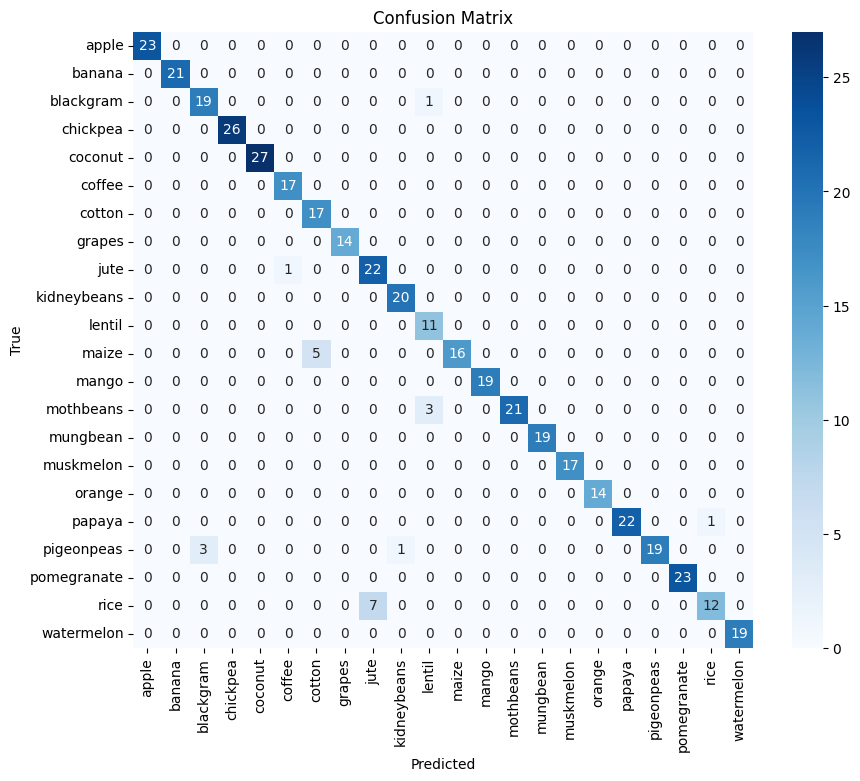

In [13]:
#confution matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
#evaluasi F1, precision, recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.86      0.95      0.90        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.77      1.00      0.87        17
      grapes       1.00      1.00      1.00        14
        jute       0.76      0.96      0.85        23
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      0.76      0.86        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.88      0.93        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [15]:
#prediksi input baru
input = [[90, 89, 45, 27.8, 84.31, 6.3, 117.8]]

input_array = np.array(input)

prediction = model.predict(input_array)
predicted_label = le.inverse_transform([prediction.argmax()])

print(f'Rekomendasi tanaman: {predicted_label[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Rekomendasi tanaman: banana


In [16]:
model.save("model_crop_recom.h5")